# Income Moderates the Relationship Between Age and Happiness

---

### Main Hypothesis (H₁):
**Hypothesis (H₁):** The relationship between age and happiness is moderated by income, such that individuals with higher income experience less of a decline in happiness with increasing age compared to those with lower income. Specifically, higher income will reduce the negative impact of age on happiness.

### Null Hypothesis (H₀):
**Null Hypothesis (H₀):** Income does not moderate the relationship between age and happiness. The effect of age on happiness is independent of income levels, meaning the relationship between age and happiness is the same for individuals across different income levels.

### Expected Influence of the Control Variable:
**Explanation of Control Variable (Gender):** Gender may also influence happiness, with potential differences in reported happiness levels between men and women. For example, societal norms or economic opportunities may result in gender-based differences in well-being, although the primary interaction of interest remains between age, income, and happiness.

---

#### Importing the libraries and dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

dataset = pd.read_csv('./data/dataset.csv')

#### Removing the outliers

In [22]:
previous_length = len(dataset)

dataset = dataset[dataset['hinctnta'].between(1, 10)]
dataset = dataset[dataset['happy'].between(0, 10)]
dataset = dataset[dataset['gndr'].isin([1, 2])]
dataset = dataset[dataset['agea'].between(0, 130)]

print(f"Previous length of data: {previous_length}")
print(f"Length of data after eliminating invalid responses: {len(dataset)}")

Previous length of data: 7853
Length of data after eliminating invalid responses: 6670


#### Calculating mean, median, standard deviation, minimum, and maximum values for each variable

In [23]:
variables = ['happy', 'gndr', 'agea', 'hinctnta']
stats = dataset[variables].describe().loc[['mean', '50%', 'std', 'min', 'max']]
stats.rename(index={'50%': 'median'}, inplace=True)
display(stats)

,happy,gndr,agea,hinctnta
mean,7.886957,1.514243,52.499550,5.798501
median,8.000000,2.000000,53.000000,6.000000
std,1.550217,0.499835,18.283655,2.682957
min,0.000000,1.000000,15.000000,1.000000
max,10.000000,2.000000,90.000000,10.000000


#### Plotting histograms for each variable to show the distribution

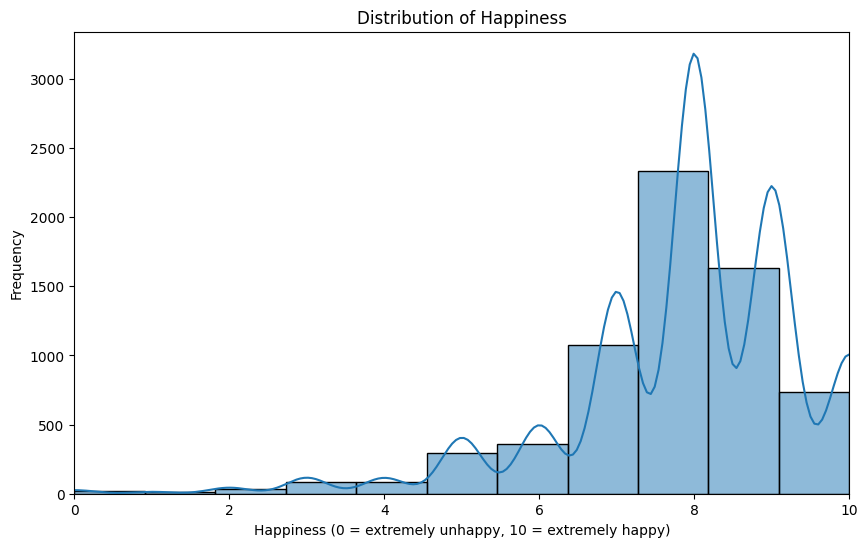

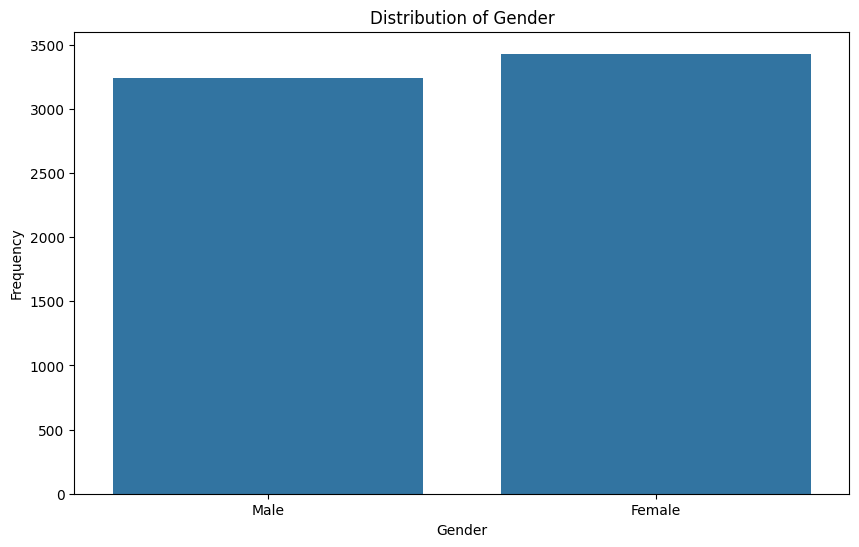

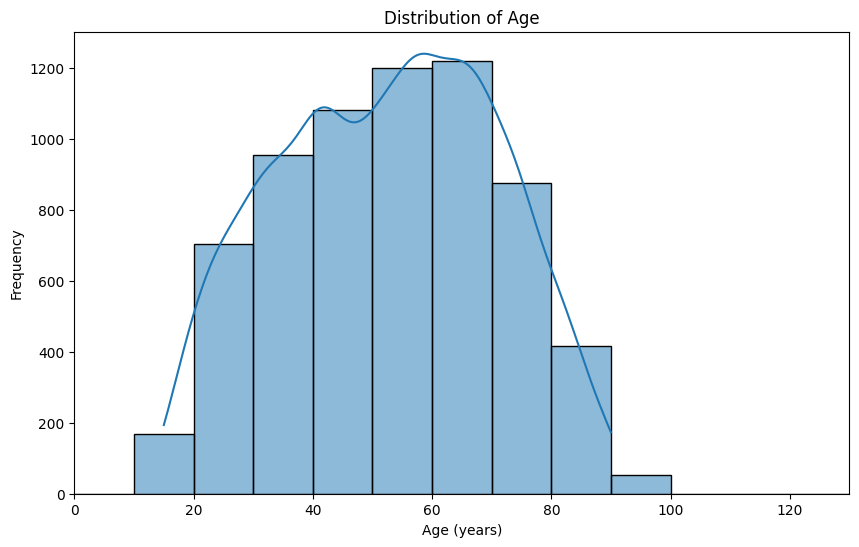

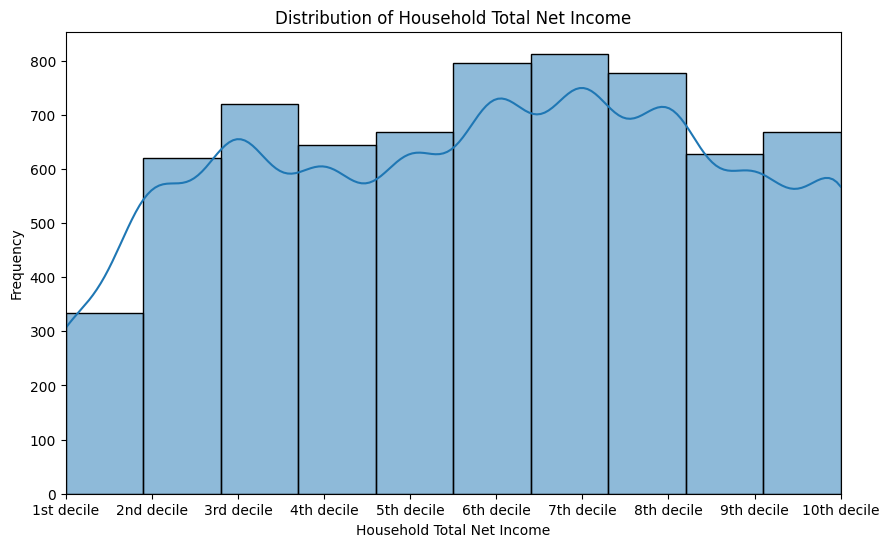

In [24]:
for var in variables:
    plt.figure(figsize=(10, 6))
    if var == 'happy':
        sns.histplot(dataset[var], kde=True, binrange=(0, 10), bins=11)
        plt.xlim(0, 10)
        plt.title('Distribution of Happiness')
        plt.xlabel('Happiness (0 = extremely unhappy, 10 = extremely happy)')
    elif var == 'gndr':
        sns.countplot(x=dataset[var])
        plt.title('Distribution of Gender')
        plt.xlabel('Gender')
        plt.xticks([0, 1], ['Male', 'Female'])
    elif var == 'agea':
        sns.histplot(dataset[var], kde=True, binrange=(0, 130), bins=13)
        plt.xlim(0, 130)
        plt.title('Distribution of Age')
        plt.xlabel('Age (years)')
    elif var == 'hinctnta':
        sns.histplot(dataset[var], kde=True, binrange=(1, 10), bins=10)
        plt.xlim(1, 10)
        plt.title('Distribution of Household Total Net Income')
        plt.xlabel('Household Total Net Income')
        plt.xticks(ticks=range(1, 11), labels=['1st decile', '2nd decile', '3rd decile', '4th decile', '5th decile', '6th decile', '7th decile', '8th decile', '9th decile', '10th decile'])
    plt.ylabel('Frequency')
    plt.show()


#### Calculating correlations between variables

In [25]:
correlations = dataset[variables].corr()
display(correlations)


,happy,gndr,agea,hinctnta
happy,1.000000,0.019882,0.028984,0.197100
gndr,0.019882,1.000000,0.015924,-0.119626
agea,0.028984,0.015924,1.000000,-0.196806
hinctnta,0.197100,-0.119626,-0.196806,1.000000


#### Plotting a heatmap of the correlations

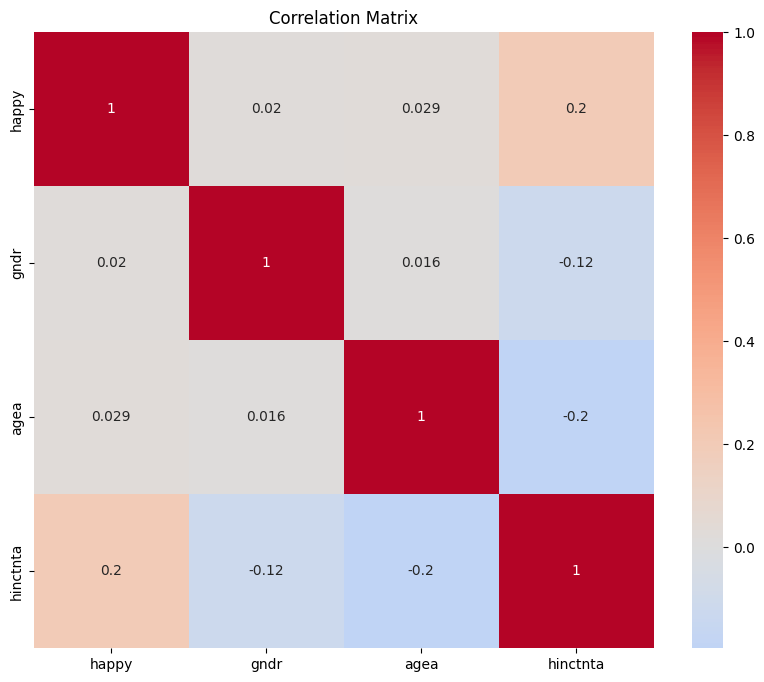

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### Creating a linear regression model

In [29]:
X = dataset[['hinctnta', 'agea', 'gndr']]  # Adding 'gndr' as a control variable
y = dataset['happy']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     106.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           3.98e-67
Time:                        16:04:18   Log-Likelihood:                -12232.
No. Observations:                6670   AIC:                         2.447e+04
Df Residuals:                    6666   BIC:                         2.450e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6369      0.098     67.472      0.0

#### Extracting the relevant information from the summary

In [30]:
coefficients = model.params
standard_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues
r_squared = model.rsquared

results_table = pd.DataFrame({
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    't-Statistic': t_values,
    'p-Value': p_values,
    'R²': [r_squared] * len(coefficients)
})

display(results_table)

,Coefficient,Standard Error,t-Statistic,p-Value,R²
const,6.636927,0.098365,67.472186,0.000000e+00,0.045591
hinctnta,0.125028,0.007102,17.604687,7.639060e-68,0.045591
agea,0.006008,0.001035,5.805906,6.696285e-09,0.045591
gndr,0.138445,0.037380,3.703690,2.142038e-04,0.045591


#### Visualizing the results effect

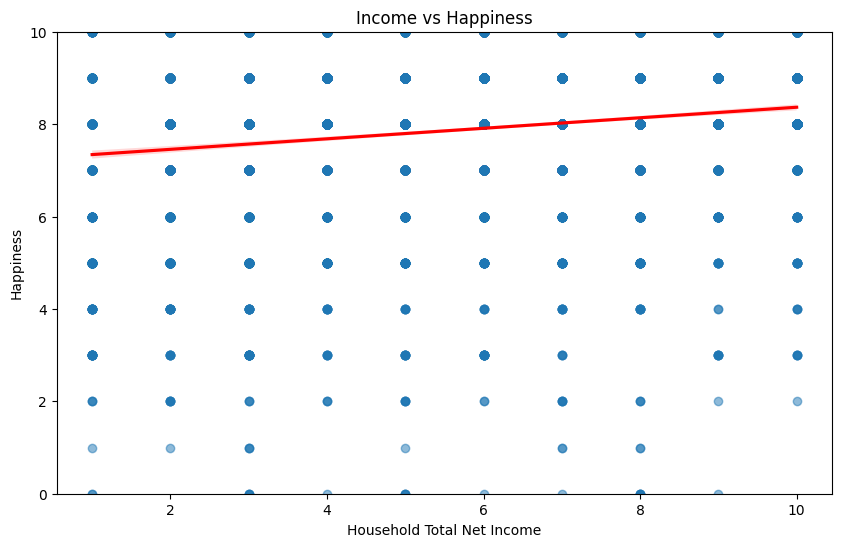

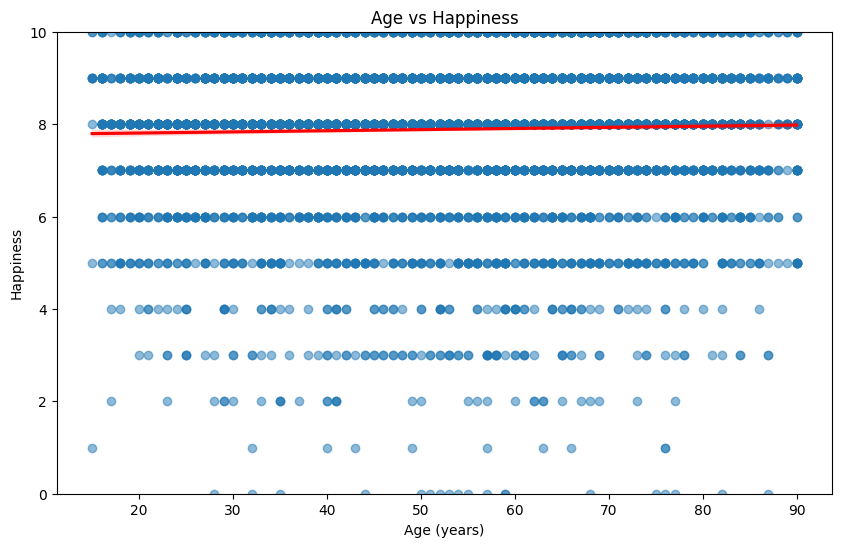

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='hinctnta', y='happy', data=dataset, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title('Income vs Happiness')
plt.xlabel('Household Total Net Income')
plt.ylabel('Happiness')
plt.ylim(0, 10)
plt.show()

dataset = dataset[dataset['agea'] < 130]

plt.figure(figsize=(10, 6))
sns.regplot(x='agea', y='happy', data=dataset, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title('Age vs Happiness')
plt.xlabel('Age (years)')
plt.ylabel('Happiness')
plt.ylim(0, 10)
plt.show()

#### Creating a regression model with interaction for the moderation effect

In [34]:
dataset['income_age_interaction'] = dataset['hinctnta'] * dataset['agea']

X = dataset[['hinctnta', 'agea', 'gndr', 'income_age_interaction']]
y = dataset['happy']

X = sm.add_constant(X)

interaction_model = sm.OLS(y, X).fit()

interaction_summary = interaction_model.summary()
print(interaction_summary)

                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     79.69
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           3.73e-66
Time:                        16:06:39   Log-Likelihood:                -12232.
No. Observations:                6670   AIC:                         2.447e+04
Df Residuals:                    6665   BIC:                         2.451e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

#### Visualizing the moderation effect

<Figure size 1000x600 with 0 Axes>

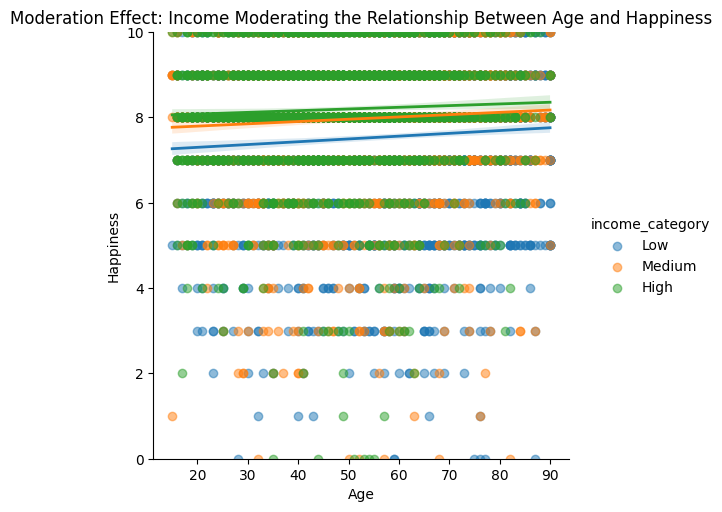

In [35]:
dataset['income_category'] = pd.qcut(dataset['hinctnta'], 3, labels=['Low', 'Medium', 'High'])
    
plt.figure(figsize=(10, 6))
sns.lmplot(x='agea', y='happy', hue='income_category', data=dataset, palette=['#1f77b4', '#ff7f0e', '#2ca02c'], scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2})
plt.title('Moderation Effect: Income Moderating the Relationship Between Age and Happiness')
plt.xlabel('Age')
plt.ylabel('Happiness')
plt.ylim(0, 10)
plt.show()

#### Visualizing age vs happiness for different income categories


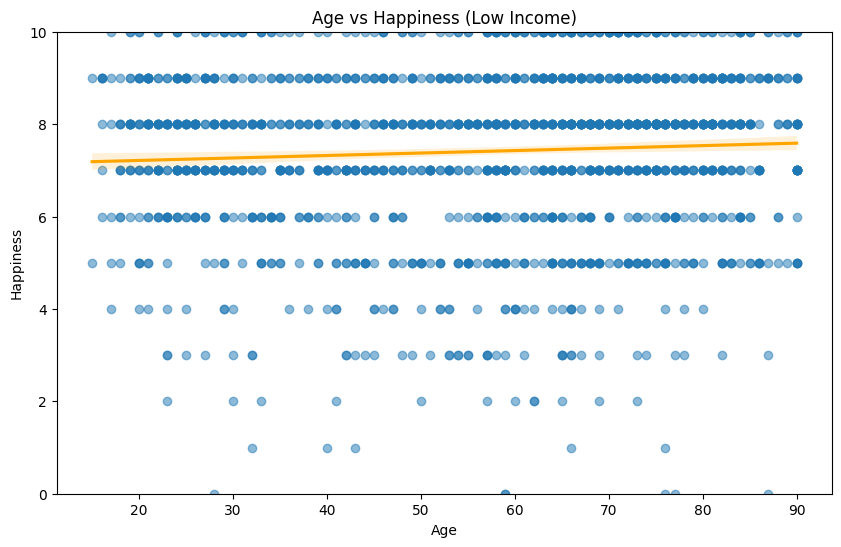

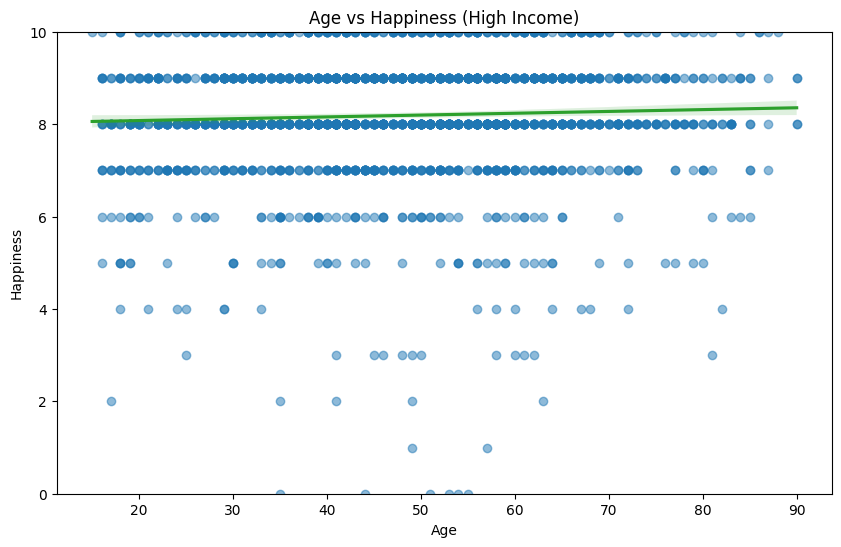

In [36]:
low_income = dataset['hinctnta'].quantile(0.25)
high_income = dataset['hinctnta'].quantile(0.75)

plt.figure(figsize=(10, 6))
sns.regplot(x='agea', y='happy', data=dataset[dataset['hinctnta'] <= low_income], line_kws={'color': 'orange'}, scatter_kws={'alpha': 0.5})
plt.title('Age vs Happiness (Low Income)')
plt.xlabel('Age')
plt.ylabel('Happiness')
plt.ylim(0, 10)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='agea', y='happy', data=dataset[dataset['hinctnta'] >= high_income], line_kws={'color': '#2ca02c'}, scatter_kws={'alpha': 0.5})
plt.title('Age vs Happiness (High Income)')
plt.xlabel('Age')
plt.ylabel('Happiness')
plt.ylim(0, 10)
plt.show()

## Results

---

### Regression Diagnostics and Corrections

Before interpreting the regression results, it's essential to assess whether the assumptions underlying the Ordinary Least Squares (OLS) regression are met. The key assumptions include:

- **Linearity**
- **Independence of errors**
- **Homoscedasticity** (constant variance of errors)
- **Normality of residuals**
- **Absence of multicollinearity**

From the regression output provided:

- **Normality of Residuals**: The **Omnibus** and **Jarque-Bera** tests have significant p-values (Prob > Omnibus = 0.000 and Prob > JB = 0.000), indicating that the residuals are not normally distributed. The skewness of -1.350 suggests negative skew, and the kurtosis of 6.525 indicates heavy tails (leptokurtic distribution).

- **Multicollinearity**: The **condition number** is high (2.64e+03), which may point to potential multicollinearity issues, especially involving the interaction term. However, examining the correlation matrix, the highest correlation between independent variables is -0.196806 (between age and income), which is not excessively high.

- **Homoscedasticity and Independence**: The **Durbin-Watson statistic** is 1.959, close to the ideal value of 2, suggesting no significant autocorrelation in the residuals. Homoscedasticity was not directly assessed in the output provided.

**Possible Corrections**:

- **Normality**: Given the large sample size (\( N = 6,670 \)), the Central Limit Theorem suggests that the OLS estimates are still reliable despite deviations from normality. However, to address non-normality, we could consider transforming the dependent variable (e.g., applying a log or square root transformation). Preliminary tests may be conducted to see if such transformations improve residual normality.

- **Multicollinearity**: To reduce potential multicollinearity involving the interaction term, we can **mean-center** the variables involved before creating the interaction term. This involves subtracting the mean from each value of the independent variables (age and income), which can help reduce multicollinearity between the interaction term and its components.

For the purposes of this analysis, we'll proceed with the existing model but acknowledge these limitations.

---

### Interpretation of Results

#### Strength and Direction of Relationships

1. **Income (`hinctnta`)**:
   - **Coefficient**: 0.1250
   - **Interpretation**: There is a positive relationship between income and happiness. For each one-unit increase in income (on a 1–10 scale), happiness increases by approximately 0.125 units on a 0–10 scale.
   - **Statistical Significance**: Highly significant (*t* = 17.605, *p* < 0.001).
   - **Practical Implication**: Higher income levels are associated with higher reported happiness, though the effect size is modest.

2. **Age (`agea`)**:
   - **Coefficient**: 0.0060
   - **Interpretation**: There is a slight positive relationship between age and happiness. Each additional year of age is associated with an increase of 0.006 units in happiness.
   - **Statistical Significance**: Significant (*t* = 5.806, *p* < 0.001).
   - **Practical Implication**: Contrary to common assumptions that happiness may decline with age, the data suggests a small increase in happiness as age increases.

3. **Gender (`gndr`)**:
   - **Coefficient**: 0.1384
   - **Interpretation**: Gender is coded as 1 for male and 2 for female. The positive coefficient indicates that females report higher happiness than males by about 0.138 units.
   - **Statistical Significance**: Significant (*t* = 3.704, *p* < 0.001).
   - **Practical Implication**: There are gender-based differences in reported happiness, with females slightly happier than males in this sample.

#### Interaction Effect (Moderation by Income)

- **Income-Age Interaction (`income_age_interaction`)**:
  - **Coefficient**: 0.0002
  - **Interpretation**: The interaction term assesses whether income moderates the relationship between age and happiness. A significant coefficient would indicate that the effect of age on happiness varies at different levels of income.
  - **Statistical Significance**: Not significant (*t* = 0.600, *p* = 0.549).
  - **Practical Implication**: There is no evidence that income moderates the relationship between age and happiness in this sample. The effect of age on happiness appears consistent across income levels.

#### Model Fit

- **R-squared**: 0.046
  - **Interpretation**: Approximately 4.6% of the variance in happiness is explained by the model, indicating a weak explanatory power.
  - **Practical Implication**: While the predictors have statistically significant effects, there are likely other unmeasured factors influencing happiness.

---

### Statistical Significance and Practical Implications

All main effects (income, age, and gender) are statistically significant, suggesting that these variables have a reliable association with happiness in the population. However, the effect sizes are relatively small, especially for age and gender.

- **Income**: The positive association suggests that financial resources contribute to happiness, supporting theories linking economic well-being to life satisfaction.

- **Age**: The slight positive effect of age on happiness challenges some societal narratives about aging and happiness. It may reflect increased life satisfaction or coping skills developed over time.

- **Gender**: The higher happiness reported by females could be influenced by various social, cultural, or psychological factors, such as differing emotional expression or support networks.

The lack of a significant interaction between income and age implies that income does not change the relationship between age and happiness. In other words, the impact of aging on happiness is similar regardless of income level.

---

### Conclusion: Hypothesis Evaluation

**Main Hypothesis (H₁)**:

*The relationship between age and happiness is moderated by income, such that individuals with higher income experience less of a decline in happiness with increasing age compared to those with lower income.*

**Findings**:

- The interaction term between income and age is not statistically significant (*p* = 0.549).
- Age has a slight positive effect on happiness, contrary to the anticipated decline.
- Income does not alter the relationship between age and happiness.

**Conclusion**:

- **Data does not support the main hypothesis (H₁)**.
- We **fail to reject the null hypothesis (H₀)**, which states that income does not moderate the relationship between age and happiness.

**Implications**:

- The anticipated negative impact of aging on happiness is not observed; instead, age slightly increases happiness.
- Income contributes positively to happiness but does not influence how age affects happiness.
- Other factors not included in the model may play significant roles in determining happiness across different ages and income levels.

---

### Final Remarks

While the study provides valuable insights into the relationships between income, age, gender, and happiness, the low R-squared value suggests that happiness is influenced by a complex array of factors beyond the variables examined. Future research could incorporate additional variables such as health status, social relationships, employment, and psychological factors to build a more comprehensive model of happiness determinants.

It's also important to consider cultural, societal, and individual differences that may affect these relationships. Qualitative studies or mixed-method approaches could enrich our understanding of how and why these factors influence happiness.


---

**Sources**:

European Social Survey (ESS). (2024). ESS Round 11 Data. Data file edition 1.0. NSD - Norwegian Centre for Research Data, Norway – Data Archive and distributor of ESS data for ESS ERIC.

